In [44]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score
from scipy.stats import hmean

## Confusion Matrix

/Users/urakamitakuya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


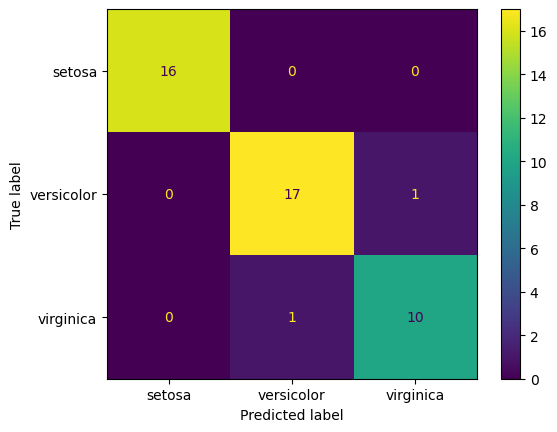

In [3]:
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# モデル学習
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)
# 予測
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

## Accuracy

In [4]:
# サンプルデータ
y_true = [1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 0, 0, 1, 0, 1]

accuracy_score(y_true, y_pred)

0.5

## Precision

In [5]:
precision_score(y_true, y_pred)

0.6

## Recall

In [6]:
recall_score(y_true, y_pred)

0.6

## Specificity

In [7]:
np.array(y_true) != 1
recall_score(np.array(y_true)!=1, np.array(y_pred)!=1)

0.3333333333333333

## 多クラス評価によるPrecision

In [8]:
# データロード
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# モデル学習
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)
# 予測
y_pred = model.predict(X_test)

/Users/urakamitakuya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [9]:
# average=None
precision_score(y_test, y_pred, average=None)

array([1.        , 0.94444444, 0.90909091])

In [10]:
# average=macro
precision_score(y_test, y_pred, average='macro')

0.9511784511784511

In [11]:
# average=micro
print(precision_score(y_test, y_pred, average='micro'))
# Specificityのmicro平均はAccuracyと同じになる
print(accuracy_score(y_test, y_pred))

0.9555555555555556
0.9555555555555556


## Precision-Recall Curve

In [13]:
df = pd.read_csv('data/heart_preprocessed.csv')
df

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_electrocardiographic_left ventricular hypertrophy,rest_electrocardiographic_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_normal,thalassemia_reversable defect
0,52,125,212,168,1.0,2,0,1,0,0,1,1,0,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,0,0,1,0,0,1,1,0,1,0,1
2,70,145,174,125,2.6,0,0,1,0,0,1,1,0,0,1,0,1,0,1
3,61,148,203,161,0.0,1,0,1,0,0,1,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,3,0,0,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,140,221,164,0.0,0,1,1,1,0,0,1,0,0,1,0,0,1,0
996,60,125,258,141,2.8,1,0,1,0,0,1,1,0,1,1,1,0,0,1
997,47,110,275,118,1.0,1,0,1,0,0,1,1,0,1,1,1,0,1,0
998,50,110,254,159,0.0,0,1,0,0,0,1,1,0,1,0,0,0,1,0


In [25]:
y_col = 'target'
X = df.drop(columns=[y_col])
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# モデル構築
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [15]:
# 実際の業務では、predict_probaの値を直接信用するのはでなく
# predict_probaで確率を見た後にPrecision-Recall Curveを見て閾値を自分で決める
y_pred_proba[:10]

array([[0.49557141, 0.50442859],
       [0.28325156, 0.71674844],
       [0.99733357, 0.00266643],
       [0.06907254, 0.93092746],
       [0.47932602, 0.52067398],
       [0.99002567, 0.00997433],
       [0.66307286, 0.33692714],
       [0.79308335, 0.20691665],
       [0.30219495, 0.69780505],
       [0.30219495, 0.69780505]])

In [17]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [18]:
precision[:10]

array([0.48666667, 0.48993289, 0.49324324, 0.49491525, 0.49829352,
       0.5       , 0.50171821, 0.50344828, 0.50519031, 0.5087108 ])

In [19]:
recall[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [27]:
thresholds[:10]

array([0.00035599, 0.00128916, 0.00156925, 0.00174511, 0.00200705,
       0.00212913, 0.00259685, 0.00266643, 0.003117  , 0.00334741])

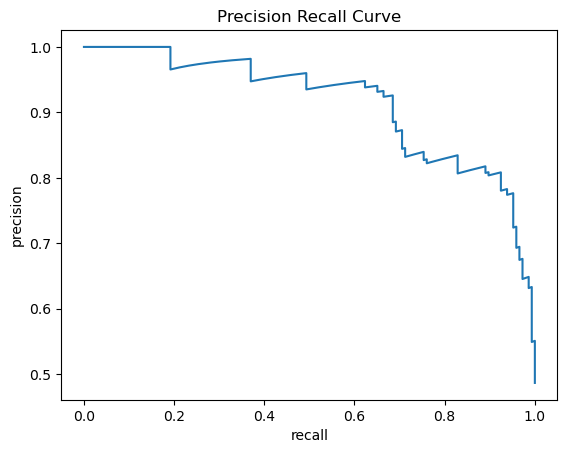

In [24]:
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.show()

## F値

In [29]:
y_true = [1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 0, 0, 1, 0, 1]
f1_score(y_true, y_pred)

0.6

## 閾値に対してのPrecision, Recall, F値の推移を描画

89th threshold(=0.44) is the highest f1 score = 0.8626198083067093


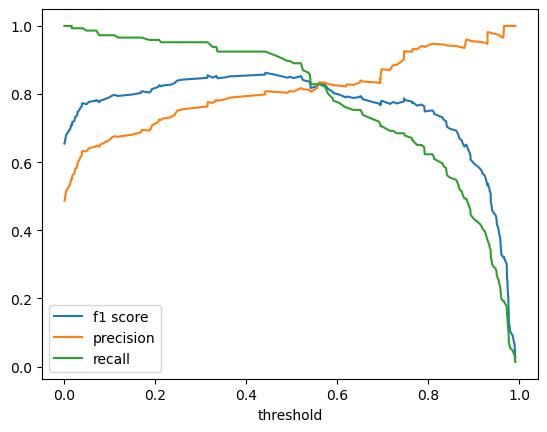

In [49]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
y_pred = model.predict(X_test)
f1_scores = [hmean([p, r]) for p, r in zip(precision, recall)]

plt.plot(thresholds, f1_scores[:-1], label='f1 score')
plt.plot(thresholds, precision[:-1], label='precision')
plt.plot(thresholds, recall[:-1], label='recall')
plt.xlabel('threshold')
plt.legend()

# thresholdを高くすると、陰性と判断するものが増えるので陽性と分類した中で本当に陽性の割合が増えていく。
print(f"{np.argmax(f1_scores)}th threshold(={thresholds[np.argmax(f1_scores)]:.2f}) is the highest f1 score = {np.max(f1_scores)}")
# 見落としをなくしたい場合は、Recallを高くする必要があり、Precisionをそこまで高くする必要はない。